# **Load libraries and data**

In [72]:
!pip install --upgrade pythainlp
!pip install pyLDAvis

In [73]:
import pandas as pd
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [74]:
df = pd.read_csv('Customer Review.csv')

In [75]:
df.tail()

,Comment,Rating,Date
25,อาหารเกาหลีร้าน Doorae อร่อยทุกอย่างเลย ชอบทั้...,4,2022-10-20
26,อยากกินอาหารเกาหลี ต้องไปโคเรียนทาวน์ ที่นี่รั...,3,2023-03-27
27,ร้านอยู่ korean town ครับ ที่จอดรถต้องเข้าซอยส...,4,2023-04-24
28,DooRae Korean Restaurant (สุขุมวิทพลาซ่า) ร้าน...,4,2023-06-22
29,วันนี้อยากทานอาหารที่โคเรียนทาวน์ ร้านนี้จึงเป...,2,2022-07-25


# **Tokenize Words**

In [76]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ', ',', ' ,', '\n', 'ร้าน', '(', ')', 'เกาหลี','โค','เรียน','ทาวน์', 'Restaurant', 'Korean','korean','town','Doorae','doorae','DooRae', 'อาหาร','กิน','ทาน']
screening_words = stopwords + removed_words

def tokenize_with_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize(str(sentence), engine='newmm')
    for word in words:
        if word not in screening_words:
            merged = merged + ',' + word
    return merged[1:]

In [77]:
df['Comment_tokenized'] = df['Comment'].apply(lambda x: tokenize_with_space(x))

In [78]:
df.tail()

,Comment,Rating,Date,Comment_tokenized
25,อาหารเกาหลีร้าน Doorae อร่อยทุกอย่างเลย ชอบทั้...,4,2022-10-20,"อร่อย,ชอบ,ปิ้ง,ย่าง,สัน,หมู,หมัก,ซอส,เนื้อ,ซี่..."
26,อยากกินอาหารเกาหลี ต้องไปโคเรียนทาวน์ ที่นี่รั...,3,2023-03-27,"ที่นี่,รับประกัน,แท้ๆ,ดู,เร,เป็นที่นิยม,อันดับ..."
27,ร้านอยู่ korean town ครับ ที่จอดรถต้องเข้าซอยส...,4,2023-04-24,"ที่จอดรถ,ซอย,สุขุมวิท,12,ลาน,จอด,ใต้ดิน,ขวามือ..."
28,DooRae Korean Restaurant (สุขุมวิทพลาซ่า) ร้าน...,4,2023-06-22,"สุขุมวิท,พลาซ่า,ร้านอาหาร,ที่อยู่,ลิสต์,ตั้งใจ..."
29,วันนี้อยากทานอาหารที่โคเรียนทาวน์ ร้านนี้จึงเป...,2,2022-07-25,"ทานอาหาร,ตั้งใจ,โอเค,2,ปีก่อน,เลือก,เนื้อวัว,เ..."


# **Create Dictionary**

In [79]:
import gensim

documents = df['Comment_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [80]:
print(dictionary.token2id.keys())

dict_keys(['ขายดี', 'ข้าว', 'ชอบ', 'ชั้น', 'ซอล', 'ซอส', 'ตอน', 'ถาม', 'ที่นั่ง', 'บิ', 'ปิ้ง', 'พนักงาน', 'มับ', 'ย่าง', 'รองรับ', 'รู้จัก', 'สดชื่น', 'สามชั้น', 'สไตล์', 'หมัก', 'หมี่', 'หมู', 'หลากหลาย', 'อร่อย', 'ฮิต', 'เกรียม', 'เครื่องเคียง', 'เด้ง', 'เย็น', 'เลือก', 'เส้น', 'Town', 'ความชอบ', 'ชื่อ', 'ดังที่', 'ตั้งอยู่', 'ต้นตำรับ', 'บริเวณ', 'ยังมี', 'ลิ้มลอง', 'สั่ง', 'สุขุมวิท', 'เข้ามา', 'เป็นหนึ่ง', 'เมนู', 'แล้วก็', 'กรอบ', 'ขวัญใจ', 'คิมบับ', 'คุณภาพ', 'จิ', 'ฉับ', 'ซี่โครง', 'ซุป', 'ถูกใจ', 'ธรรมชาติ', 'นัล', 'นัว', 'บริการ', 'บอ', 'ผักสด', 'พิซซ่า', 'ฟี', 'ยอง', 'รส', 'ราคา', 'ร้านอาหาร', 'ล', 'ลาย', 'สะอาด', 'หอมกรุ่น', 'หอย', 'อริ', 'ออกปาก', 'อั้น', 'อู', 'อ่อน', 'ฮอต', 'เซ', 'เด็ด', 'เตา', 'เติม', 'เต้าหู้', 'เบิ้ล', 'เลป', 'แจ่ม', 'แช', 'แน่น', 'แบ', 'แฟน', 'แสง', 'ไฮไลท์', '-', '..', 'กก', 'กลมกล่อม', 'กะ', 'กี่', 'งึบงั้บ', 'จอน', 'จุก', 'ซี', 'ดึ้ง', 'ตลับ', 'ท', 'ทำ', 'ที่มา', 'นุ่ม', 'ป', 'ปัง', 'ฟู้ด', 'รายการ', 'รี', 'ร้อน', 'ว่าที่', 'หอม', 'เกลือ', 'เข้าเ

In [81]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencis = [[(dictionary[id],frequence) for id, frequence in couple] for couple in gensim_corpus]

# **Topic Modeling**

In [82]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [83]:
from gensim import models

n_topics = 7

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [84]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.037288 -0.026226       1        1  34.617742
4     -0.043938 -0.059002       2        1  25.086936
3     -0.029779 -0.022279       3        1  14.840359
6     -0.107379  0.012980       4        1  10.352556
5      0.033269  0.132646       5        1   6.757328
1      0.018565  0.006113       6        1   4.280441
2      0.166549 -0.044231       7        1   4.064638, topic_info=         Term       Freq      Total Category  logprob  loglift
14       ราคา  11.000000  11.000000  Default  30.0000  30.0000
15  ร้านอาหาร   7.000000   7.000000  Default  29.0000  29.0000
5       เลือก   9.000000   9.000000  Default  28.0000  28.0000
25     รสชาติ  15.000000  15.000000  Default  27.0000  27.0000
13     บริการ  10.000000  10.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
0        ชั้น   0.116398  16.573697   Topic7  -4.8695  -1.7557
8        เมนู   0.116354  16.949907   Topic7  -4.8699  -1.7785
21       นุ่ม   0.116339  13.955141   Topic7  -4.8700  -1.5843
25     รสชาติ   0.116299  15.512203   Topic7  -4.8703  -1.6904
20          -   0.116261  15.161241   Topic7  -4.8706  -1.6678

[271 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
20        1  0.527661     -
20        2  0.197873     -
20        3  0.197873     -
6         1  0.259890  Town
6         2  0.259890  Town
...     ...       ...   ...
34        3  0.162464  โต๊ะ
34        4  0.324928  โต๊ะ
37        1  0.264494   ใส่
37        2  0.528987   ใส่
37        6  0.132247   ใส่

[173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 7, 6, 2, 3])

# **Wordcloud**

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [86]:
path = '/content/THSarabunNew.ttf'

In [87]:
long_string = ','.join(list(df['Comment'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud.generate(long_string)

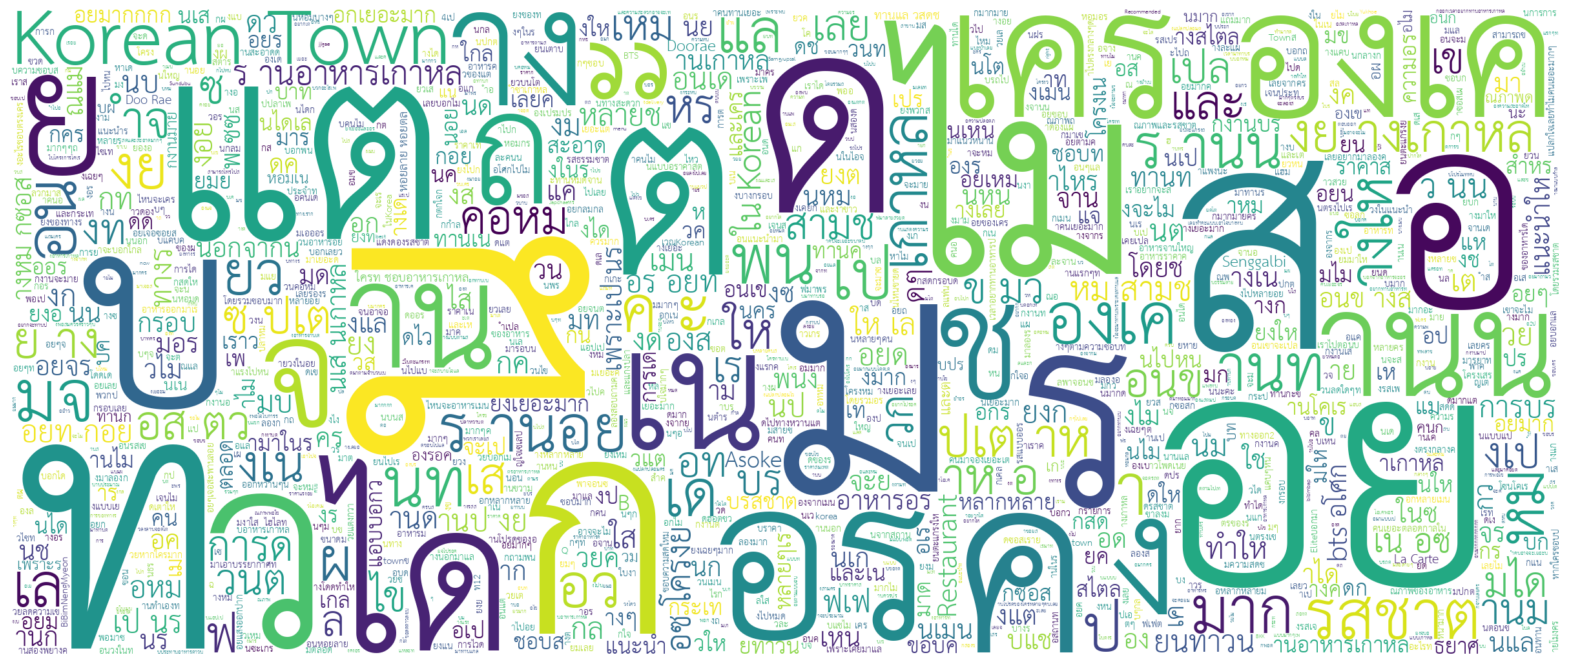

In [89]:
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud.generate(long_string)

# Display the word cloud using Matplotlib
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()